In [40]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [41]:
n=100

In [42]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.5573,  1.0000],
        [-0.5948,  1.0000],
        [-0.6813,  1.0000],
        [ 0.8673,  1.0000],
        [-0.2073,  1.0000]])

In [43]:
# create co-efficients
a = tensor(3.,2); a

tensor([3., 2.])

In [44]:
# x@a = matrix product between x and a
x@a

tensor([ 0.3281,  0.2155, -0.0440,  4.6018,  1.3781,  2.8833,  0.4901,  1.9016,
         4.3113,  2.9525,  3.0476,  0.4695,  3.8986,  2.9103,  0.0191,  3.8284,
         0.8144,  2.5026,  3.3167,  1.6678,  0.0873, -0.6749,  3.0267, -0.9882,
         0.5370,  0.4259,  2.5592,  3.1872,  4.5472,  0.3246, -0.7740,  4.0057,
         3.9076,  2.1137,  1.1812,  1.5403,  3.5727,  3.7649,  1.7471, -0.2319,
         0.2018, -0.3668, -0.2151, -0.6118,  2.9088,  1.0347,  0.4908,  3.1791,
         2.5655,  3.6700,  0.2445,  4.5617, -0.4087, -0.0915,  1.1211,  4.7514,
         4.8182,  3.9072,  4.3407,  1.8868,  3.8490,  2.8550,  4.6688,  4.3993,
         1.3674,  0.6304, -0.5595,  1.6795,  1.6790, -0.8298, -0.4993,  2.1840,
        -0.9893,  3.6412, -0.4433,  0.5293,  3.0641, -0.2160,  3.4665,  0.9262,
         1.2031,  4.0898,  1.1810,  3.9916, -0.8712,  4.4352,  4.6760,  1.4982,
         4.4269,  1.8853,  1.9377, -0.9544,  0.7407,  1.3026,  2.9257,  3.9273,
         3.5735,  4.8083,  2.4199,  0.43

In [46]:
# First value in the matrix product
(-0.5573 * 3) + (1 * 2)

0.32810000000000006

In [47]:
y = x@a + torch.rand(n)

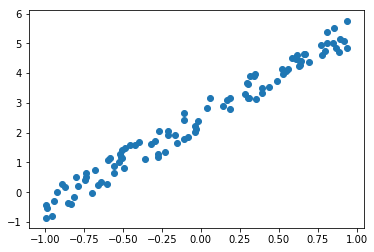

In [48]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [49]:
# y_hat = prediction, y = atual
def mse(y_hat, y):
    return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [50]:
a = tensor(-1.,1)
a

tensor([-1.,  1.])

In [51]:
y_hat = x@a
mse(y_hat, y)

tensor(7.6069)

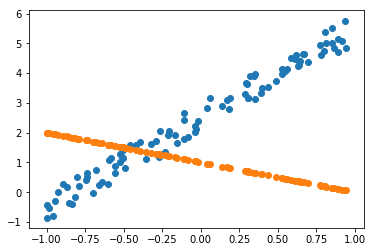

In [52]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [53]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [54]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0:
        print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [55]:
#lr = 1e-1
lr = 1e-1
for t in range(100): update()

tensor(7.6069, grad_fn=<MeanBackward1>)
tensor(1.4271, grad_fn=<MeanBackward1>)
tensor(0.3906, grad_fn=<MeanBackward1>)
tensor(0.1546, grad_fn=<MeanBackward1>)
tensor(0.0999, grad_fn=<MeanBackward1>)
tensor(0.0872, grad_fn=<MeanBackward1>)
tensor(0.0843, grad_fn=<MeanBackward1>)
tensor(0.0836, grad_fn=<MeanBackward1>)
tensor(0.0834, grad_fn=<MeanBackward1>)
tensor(0.0834, grad_fn=<MeanBackward1>)


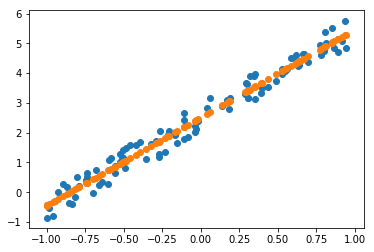

In [56]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [57]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [58]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.